### This notebook walks your through reading in the datasets required for your project. All other elements of the notebook are to be designed from you based on what we have learned in the course thus far, including descriptive markdown and best practices.

In [153]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
import pandas as pd

### Load in decadal-averaged WOA18 datasets using `xr.open_zarr` and extract the `potential_temperature` DataArray. The dataset is broken up by averaged decades (1955 to 1964 average ... and so on), thus it is possible to compare changes across decades if you wish. The `woa18_decav_potential_temp` file contains the time-averaged fields from 1981 to 2010, the "Climate Normal".

In [2]:
woa18_1955_64_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1994_04_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

### Documentation of the WOA18 product can be found [__here__](https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/). You will be expected to be able to speak knowledgeably about the main ways in which we observe the ocean and what the __World Ocean Atlas__ is. Spend some time researching this.

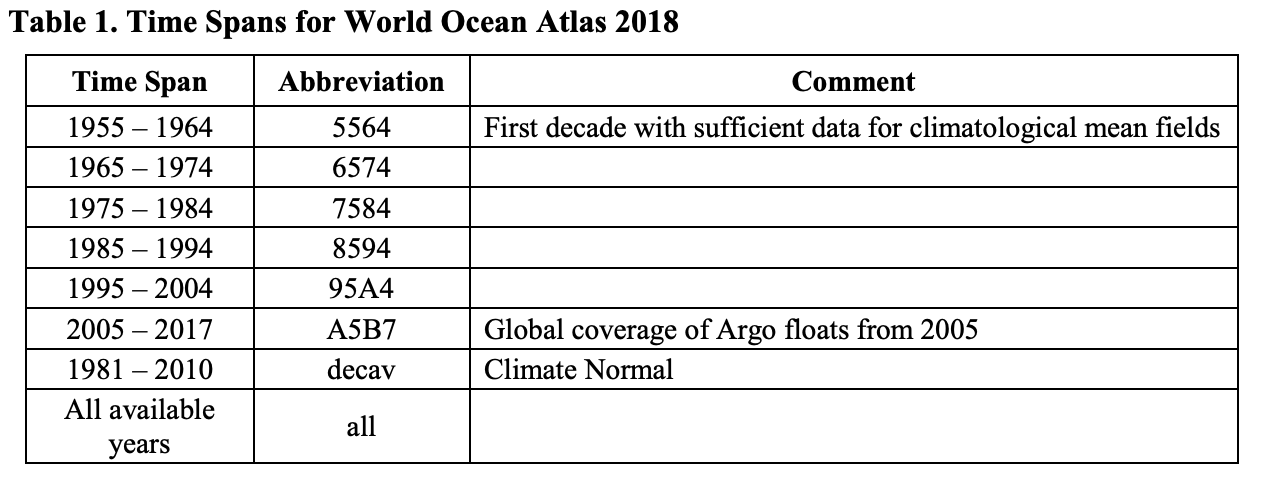

In [3]:
woa18_1955_64_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

### For analysis at the _basin scale_ you will need the ocean basins mask provided below. This seperates the global ocean into distinct basins identified by integer values such that:
* ### Southern Ocean = 1
* ### Atlantic Ocean = 2
* ### Pacific Ocean = 3
* ### Arctic Ocean = 4
* ### Indian Ocean = 5

In [23]:
woa18_basins = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

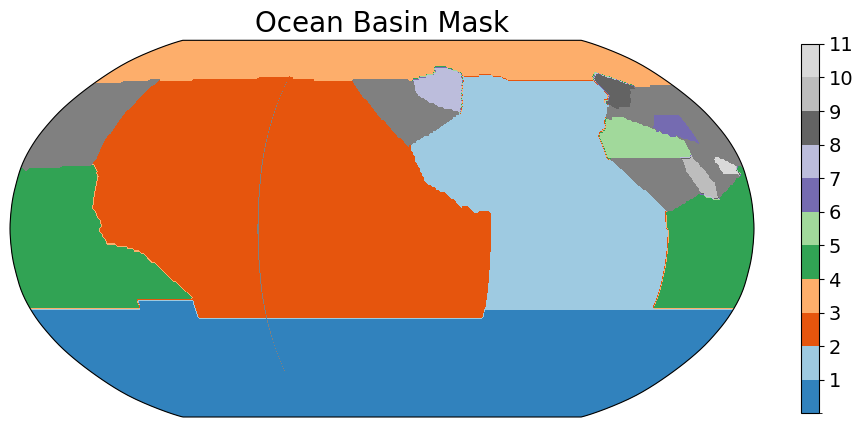

In [24]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

### To isolate the Southern Ocean we can use Xarray's `.where()` method:

In [25]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

In [26]:
atlanticocean

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 438.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Ocean Basin Mask')

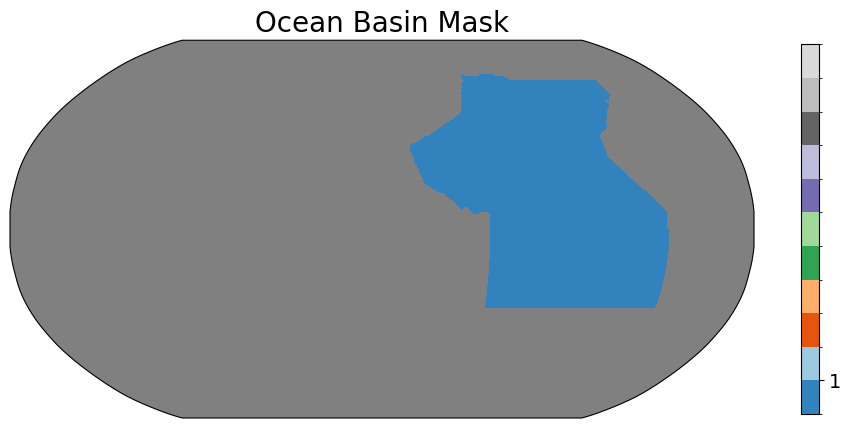

In [27]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = atlanticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

Text(0.5, 1.0, 'SST Atlantic 1955 to 1964 averaged')

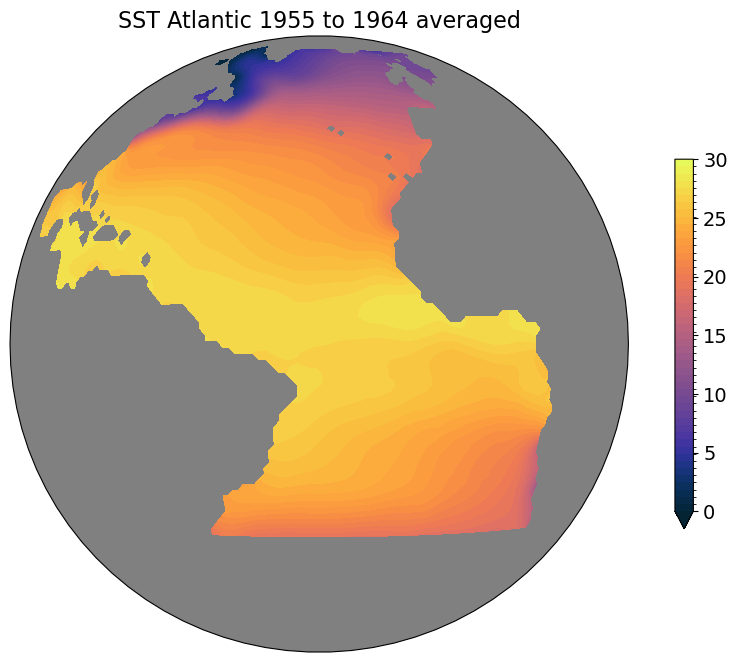

In [109]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1955 to 1964 averaged",fontsize=16)

### Now we can multiply our mask by the DataArray to isolate just the temperatures over a specific region:

In [29]:
woa18_1955_64_atlantic = woa18_1955_64_potential_temp*atlanticocean

In [30]:
woa18_1965_74_atlantic = woa18_1965_74_potential_temp*atlanticocean

In [31]:
woa18_1975_84_atlantic = woa18_1975_84_potential_temp*atlanticocean

In [32]:
woa18_1985_94_atlantic = woa18_1985_94_potential_temp*atlanticocean

In [33]:
woa18_1994_04_atlantic = woa18_1994_04_potential_temp*atlanticocean

In [34]:
woa18_2005_17_atlantic = woa18_2005_17_potential_temp*atlanticocean

In [35]:
difference55_74 = woa18_1965_74_atlantic - woa18_1955_64_atlantic

In [36]:
difference55_84 = woa18_1975_84_atlantic - woa18_1955_64_atlantic

In [37]:
difference55_94 = woa18_1985_94_atlantic - woa18_1955_64_atlantic

In [38]:
difference55_04 = woa18_1994_04_atlantic - woa18_1955_64_atlantic

In [39]:
difference55_17 = woa18_2005_17_atlantic - woa18_1955_64_atlantic

In [40]:
woa18_1955_64_atlantic

<xarray.DataArray (depth: 102, lat: 180, lon: 360)>
dask.array<mul, shape=(102, 180, 360), dtype=float64, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 438.0

Text(0.5, 1.0, 'SST Atlantic 1955 to 1964 averaged')

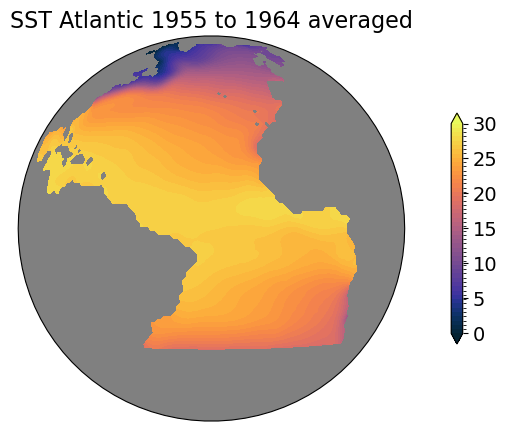

In [103]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = woa18_1955_64_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,extend = 'both', levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1955 to 1964 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Atlantic 2005 to 2017 averaged')

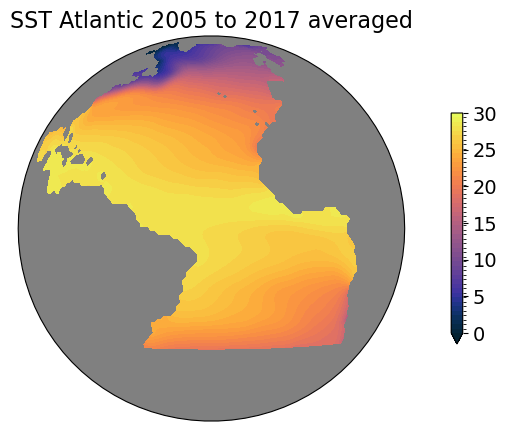

In [100]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')
plt.figure(figsize=[12,5])

p = woa18_2005_17_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 2005 to 2017 averaged",fontsize=16)

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 1974')

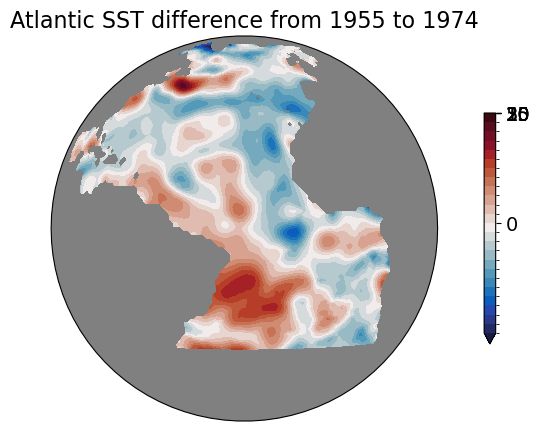

In [98]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_74.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 1974",fontsize=16)

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 1984')

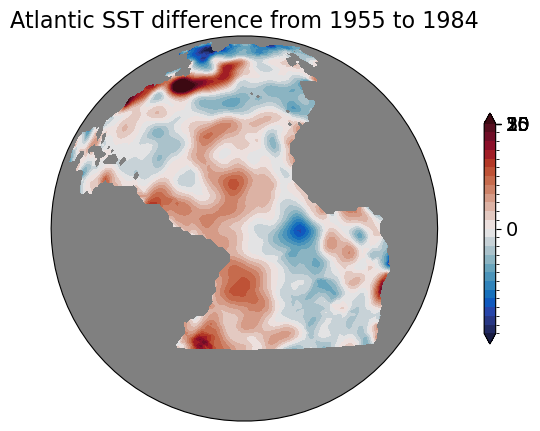

In [97]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_84.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 1984",fontsize=16)

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 1994')

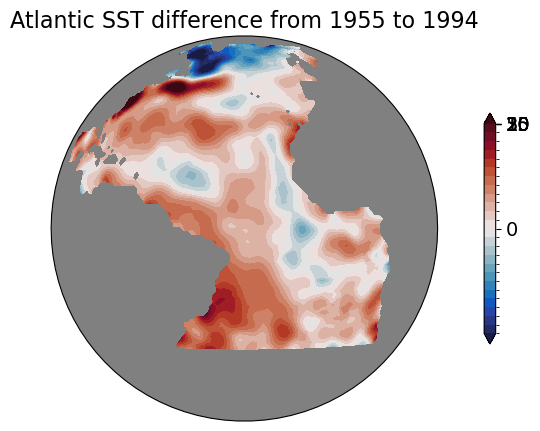

In [96]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_94.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 1994",fontsize=16)

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 2004')

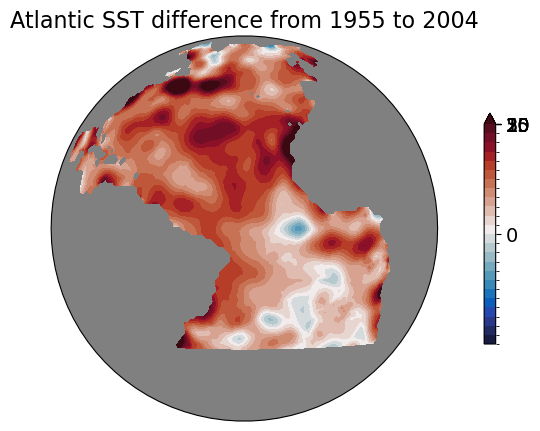

In [95]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_04.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 2004",fontsize=16)

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 2017')

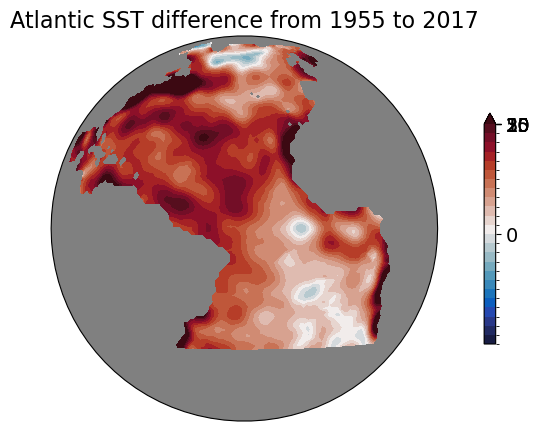

In [94]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_17.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 2017",fontsize=16)

In [93]:

subplot_kws = dict(projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=-30, satellite_height=35785831, false_easting=0, false_northing=0, globe=None,facecolor='grey')
.Geostationary(central_longitude=-30
plt.figure(figsize=[12,8])

p = difference55_17.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)

SyntaxError: invalid syntax (3255324730.py, line 3)

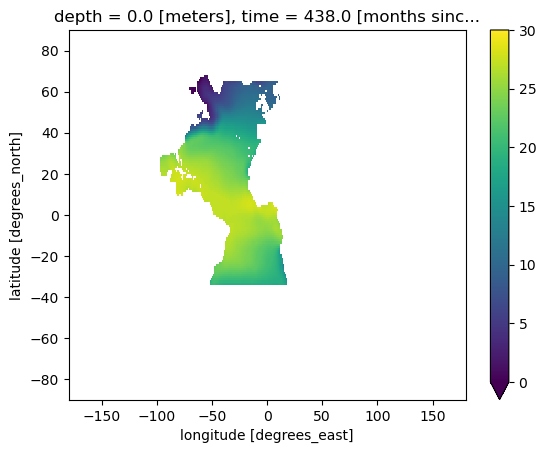

In [50]:
woa18_1955_64_atlantic.isel(depth=0).plot(vmin=0, vmax=30)

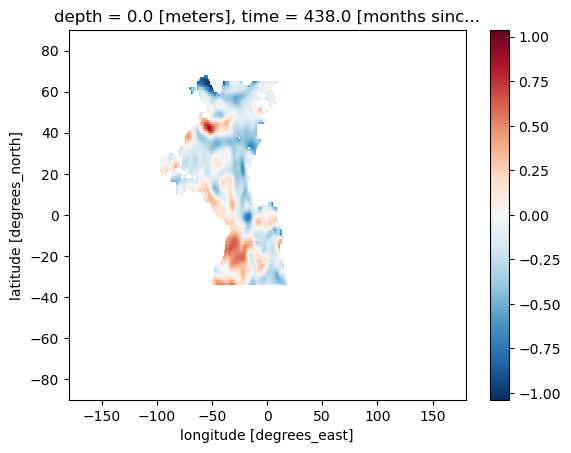

In [51]:
difference55_74.isel(depth=0).plot()

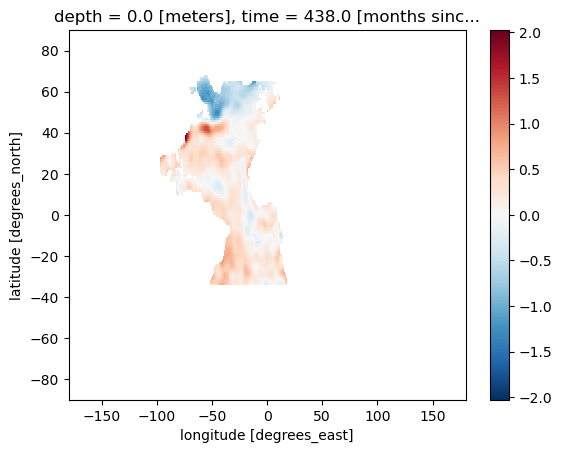

In [52]:
difference55_94.isel(depth=0).plot()

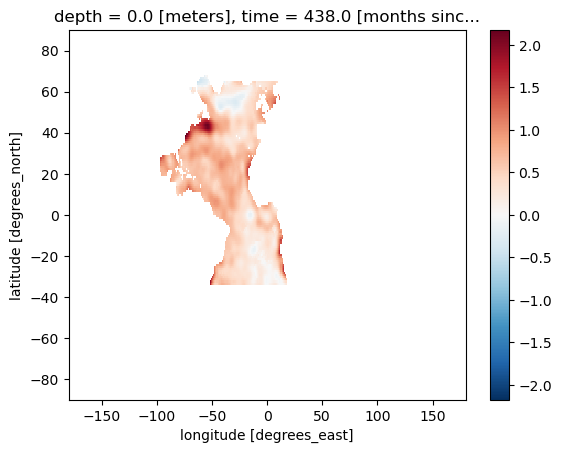

In [53]:
difference55_17.isel(depth=0).plot()

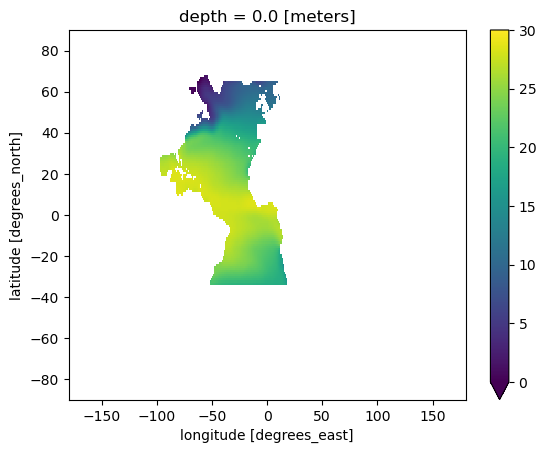

In [54]:
woa18_2005_17_atlantic.isel(depth=0).plot( vmin=0, vmax=30)

Text(0.5, 1.0, 'SST Atlantic 2005 to 2017 averaged')

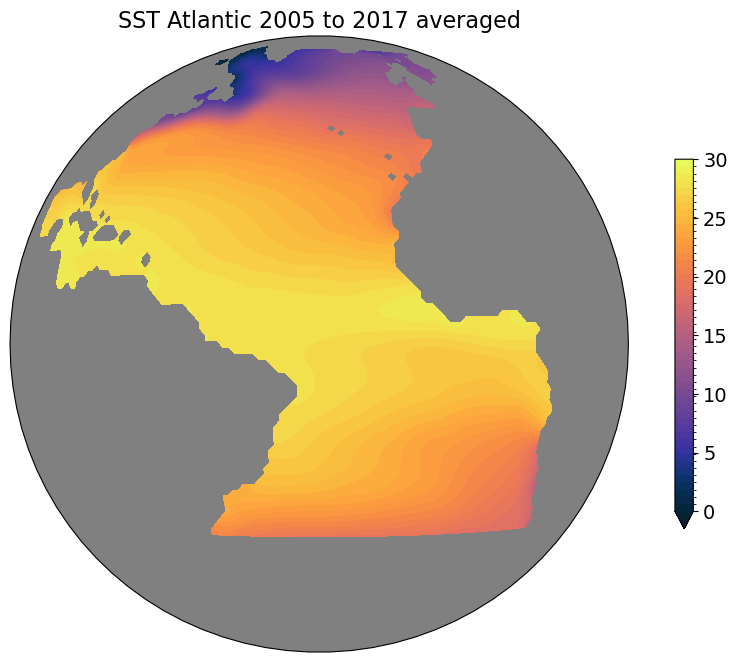

In [117]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_2005_17_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 2005 to 2017 averaged",fontsize=16)

### The other files for your project include time series of observed __ocean heat content__, __steric sea level rise__, __thermosteric sea level rise__, and __halosteric sea level rise__ broken up into that computed over the top 700 m of the water column and over the upper 2000 m.

### This data is from: https://www.ncei.noaa.gov/access/global-ocean-heat-content/index.html

In [56]:
ocean_heat_content_0_2000 = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
ocean_heat_content_0_700 = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc',
                                          decode_times=False)
steric_sealvl_0_700 = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc',
                                     decode_times=False)
steric_sealvl_0_2000 = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc', 
                                      decode_times=False)
#### and so on ... there are more files!

In [125]:
steric_sealvl_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [81]:
steric_sealvl_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [58]:
steric700WO = steric_sealvl_0_700.yearl_s_mm_WO
steric700AO = steric_sealvl_0_700.yearl_s_mm_AO
steric700PO = steric_sealvl_0_700.yearl_s_mm_PO
steric700IO = steric_sealvl_0_700.yearl_s_mm_IO
steric700SH = steric_sealvl_0_700.yearl_s_mm_SH
steric700NH = steric_sealvl_0_700.yearl_s_mm_NH

In [59]:
steric2000WO = steric_sealvl_0_2000.yearl_s_mm_WO
steric2000AO = steric_sealvl_0_2000.yearl_s_mm_AO
steric2000PO = steric_sealvl_0_2000.yearl_s_mm_PO
steric2000IO = steric_sealvl_0_2000.yearl_s_mm_IO
steric2000SH = steric_sealvl_0_2000.yearl_s_mm_SH
steric2000NH = steric_sealvl_0_2000.yearl_s_mm_NH

In [129]:
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
steric700years = steric_sealvl_0_700.drop(labels='time').assign_coords({'time':years}) #assigning time labels to years
steric700WOyears = steric700WO.drop(labels='time').assign_coords({'time':years}) #doing it for each ocean
steric700AOyears = steric700AO.drop(labels='time').assign_coords({'time':years}) 
steric700POyears = steric700PO.drop(labels='time').assign_coords({'time':years})
steric700IOyears = steric700IO.drop(labels='time').assign_coords({'time':years})
steric700SHyears = steric700SH.drop(labels='time').assign_coords({'time':years})
steric700NHyears = steric700NH.drop(labels='time').assign_coords({'time':years})

In [130]:
steric2000years = steric_sealvl_0_700.drop(labels='time').assign_coords({'time':years}) #assigning time labels to years
steric2000WOyears = steric2000WO.drop(labels='time').assign_coords({'time':years}) #doing it for each ocean
steric2000AOyears = steric2000AO.drop(labels='time').assign_coords({'time':years})
steric2000POyears = steric2000PO.drop(labels='time').assign_coords({'time':years})
steric2000IOyears = steric2000IO.drop(labels='time').assign_coords({'time':years})
steric2000SHyears = steric2000SH.drop(labels='time').assign_coords({'time':years})
steric2000NHyears = steric2000NH.drop(labels='time').assign_coords({'time':years})

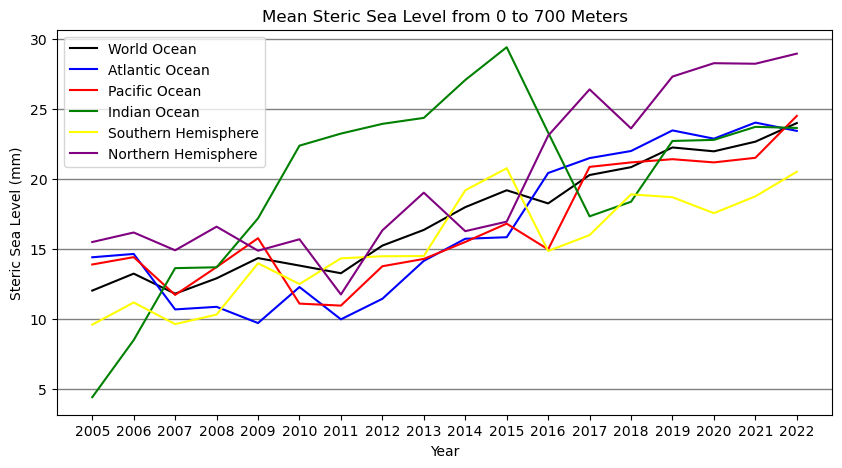

In [151]:
fig, ax = plt.subplots(figsize = (10,5))
steric700WOyears.plot(label ='World Ocean', color ='k')
steric700AOyears.plot(label = 'Atlantic Ocean', color ='b')
steric700POyears.plot(label = 'Pacific Ocean', color = 'red')
steric700IOyears.plot(label = 'Indian Ocean', color = 'green')
steric700SHyears.plot(label = 'Southern Hemisphere' , color = 'yellow')
steric700NHyears.plot(label='Northern Hemisphere', color = 'purple')
plt.title('Mean Steric Sea Level from 0 to 700 Meters')
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)')
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

In [126]:
import pandas as pd
years_0_700_steric_sealvl_0_700 = pd.date_range("2005","2023", freq="Y")
steric_700 = steric_sealvl_0_700.drop(labels='time').assign_coords(coords={"time":years_0_700_steric_sealvl_0_700})

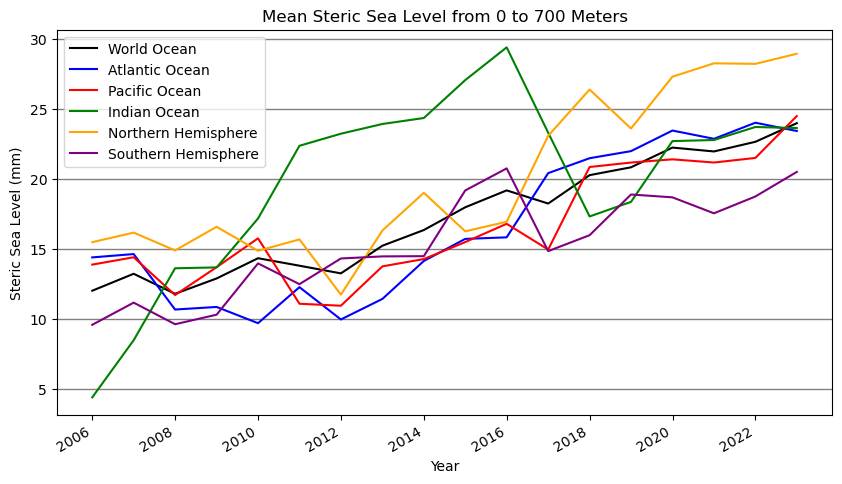

In [150]:
fig, ax = plt.subplots(figsize = (10,5))
steric_700.yearl_s_mm_WO.plot(label = 'World Ocean' ,linewidth=1.5, color = 'k')
steric_700.yearl_s_mm_AO.plot(label = 'Atlantic Ocean' ,linewidth=1.5, color = 'blue')
steric_700.yearl_s_mm_PO.plot(label = 'Pacific Ocean' ,linewidth=1.5, color = 'red')
steric_700.yearl_s_mm_IO.plot(label = 'Indian Ocean' ,linewidth=1.5, color = 'green')
steric_700.yearl_s_mm_NH.plot(label = 'Northern Hemisphere' ,linewidth=1.5, color = 'orange')
steric_700.yearl_s_mm_SH.plot(label = 'Southern Hemisphere' ,linewidth=1.5, color = 'purple')
plt.title('Mean Steric Sea Level from 0 to 700 Meters')
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)')
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

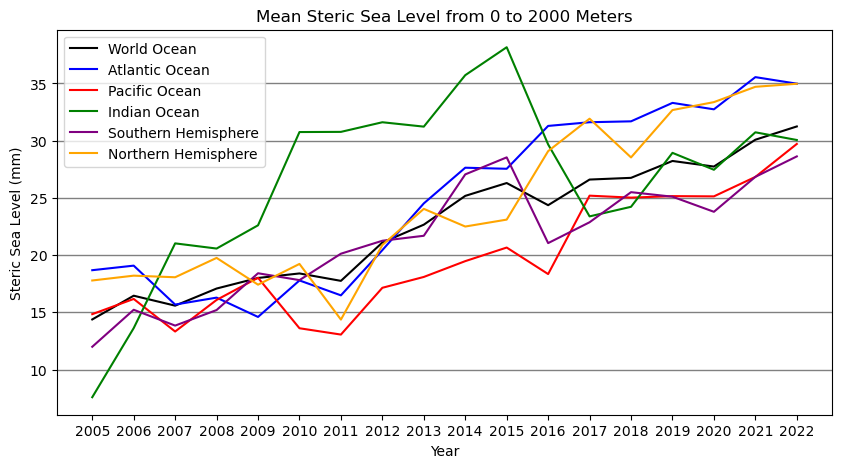

In [152]:
fig, ax = plt.subplots(figsize = (10,5))
steric2000WOyears.plot(label ='World Ocean', color = 'k')
steric2000AOyears.plot(label = 'Atlantic Ocean' , color = 'b')
steric2000POyears.plot(label = 'Pacific Ocean', color = 'red')
steric2000IOyears.plot(label = 'Indian Ocean', color = 'green')
steric2000SHyears.plot(label = 'Southern Hemisphere', color = 'purple')
steric2000NHyears.plot(label='Northern Hemisphere', color = 'orange')
plt.title('Mean Steric Sea Level from 0 to 2000 Meters')
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)')
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

In [64]:
ocean_heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [67]:
steric_sealvl_0_700.yearl_s_mm_WO

<xarray.DataArray 'yearl_s_mm_WO' (time: 18)>
[18 values with dtype=float32]
Coordinates:
  * time     (time) float32 606.0 618.0 630.0 642.0 ... 774.0 786.0 798.0 810.0
Attributes:
    long_name:  global_mean_total_steric_sea_level_anomaly_0-700 
    units:      millimeters

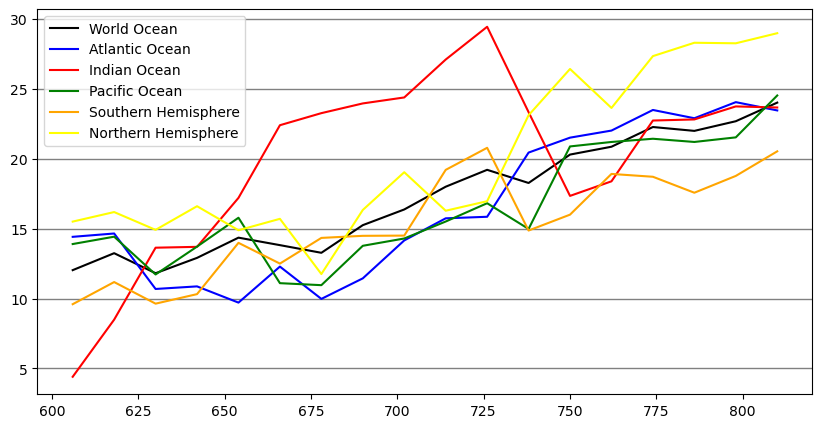

In [68]:
fig, ax = plt.subplots(figsize = (10,5))


ax.plot(steric_sealvl_0_700['time'],
       steric700WO, label = 'World Ocean', color = 'k')
ax.plot(steric_sealvl_0_700['time'],
    steric700AO, label = 'Atlantic Ocean', color = 'b')
ax.plot(steric_sealvl_0_700['time'],
       steric700IO, label = 'Indian Ocean', color = 'red')
ax.plot(steric_sealvl_0_700['time'],
        steric700PO, label = 'Pacific Ocean', color = 'green')
ax.plot(steric_sealvl_0_700['time'],
        steric700SH, label = 'Southern Hemisphere', color = 'orange')
ax.plot(steric_sealvl_0_700['time'],
       steric700NH, label = 'Northern Hemisphere',color = 'yellow')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

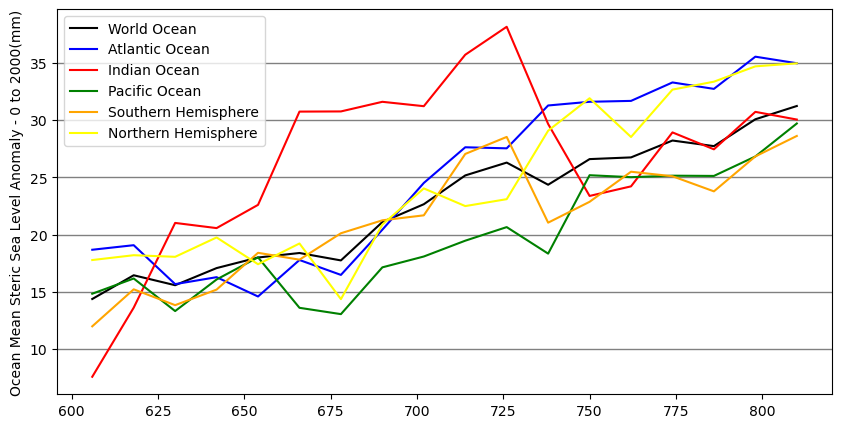

In [69]:
fig, ax = plt.subplots(figsize = (10,5))


ax.plot(steric_sealvl_0_2000['time'],
       steric2000WO, label = 'World Ocean', color = 'k')
ax.plot(steric_sealvl_0_2000['time'],
    steric2000AO, label = 'Atlantic Ocean', color = 'b')
ax.plot(steric_sealvl_0_2000['time'],
       steric2000IO, label = 'Indian Ocean', color = 'red')
ax.plot(steric_sealvl_0_2000['time'],
        steric2000PO, label = 'Pacific Ocean', color = 'green')
ax.plot(steric_sealvl_0_2000['time'],
        steric2000SH, label = 'Southern Hemisphere', color = 'orange')
ax.plot(steric_sealvl_0_2000['time'],
       steric2000NH, label = 'Northern Hemisphere',color = 'yellow')
ax.set_ylabel('Ocean Mean Steric Sea Level Anomaly - 0 to 2000(mm)')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

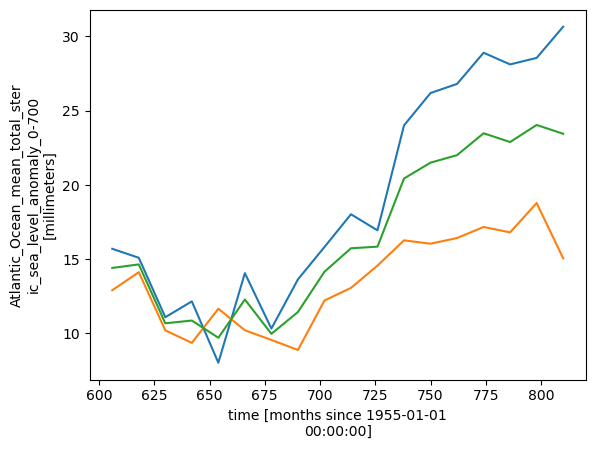

In [70]:
steric_sealvl_0_700.yearl_s_mm_NA.plot()
steric_sealvl_0_700.yearl_s_mm_SA.plot()
steric_sealvl_0_700.yearl_s_mm_AO.plot()


In [161]:
woa18_2005_17_potential_temp.isel(depth=0).sel(lat=slice(55,89.5)).mean(dim=['lat','lon']).values

array(0.5992968, dtype=float32)

### The climate model output can be retrieved via the same methods we worked through in Unit 7 --- please refer back to that tutorial for working with CMIP6 data on Google Cloud Store and make the appropriate selection in the catalog to get your GFDL-ESM4 historical Omon thetao data ....